
<h2 style="text-align: center;">Desafío Equinox AI and Data Lab </h2>





Saludos aspirante:
Estás a punto de comenzar un reto para demostrar que puedes ser parte de Equinox.

Lee con atención las instrucciones para que puedas llevar a cabo tu prueba:

El Desafío Equinox **evaluará 4 aspectos básicos** que se requieren a la hora de elegir a un perfil. 
Por lo tanto la prueba estará dividida en **4 partes**.

- La primera parte evaluará tus conocimientos en **análisis y tratamiento de información**, esto junto a tu habilidad técnica en jupyter Notebooks, Python y demás librerias requeridas en Data analysis.

- La segunda parte esta orientada a conocer tu desempeño en la construcción de modelos de **Machine Learning**, Ten en cuenta seguir el pipeline completo para demostrar que tu modelo tiene un correcto desempeño.

- La tercera parte es un ejercicio orientado a evaluar tus **capacidades en SQL**. Consta de tres preguntas de negocio con la cuales queremos observar tu habilidad en el lenguaje.

- La cuarta parte es un ejercicio de **comunicación**, en donde serás entrevistado por líderes del área y tendrás que contarnos sobre el modo en que abordaste el desafío.

<h4>Reglas para el desafío</h4>

- El desafío podrá ser resuelto en aproximadamente 3 días, **comenzando el viernes 20 de Mayo a las 2:00 pm  y terminará el Lunes 23 de Mayo a las 01:00 pm** .

- Es necesario contar con una cuenta de github para poder descargar el contenido del desafío y subir tus respuestas. Si no tienes una cuenta puedes dirigirte al sitio https://github.com/ y crear una.

- Para la primera y segunda parte se utilizarán Jupyter Notebooks, Python y sus librerías orientadas a análisis de Datos y Machine Learning. Asegúrate de tener instaladas estas herramientas en tu equipo antes del lanzamiento del desafío para que puedas dedicar tus esfuerzos a resolver los problemas.

- La tercera parte tomará la base de datos que esta alojada en https://www.w3schools.com/sql/trysql.asp?filename=trysql_select_all como referencia para las preguntas planteadas. Allí encontrarás una pequeña base de datos y un sandbox donde podrás probar tus queries.

- Todo lo que construyas debe estár en un Jupyter Notebook, La primera y segunda parte deben correr dentro del notebook, mientras que para la tercera parte, solamente debes colocar los queries que resuelvan las preguntas de esta parte. **Asegurate de ser ordenado** para que nuestro proceso de validación pueda ser ágil.

- Asegúrate de dar fork al repositorio https://github.com/EquinoxAI/desafio_equinox con tu nombre y apellido. **Ten en cuenta siempre  dar commit y subir archivos, para poder evaluar tu prueba.**
![example1](img/fork1.png)
![example2](img/fork2.png)

- Debes estar atento las próximas semanas para realizar una entrevista, en la cuál deberás sustentar temas puntuales de tu prueba.


Desde Equinox te deseamos muchos éxitos en este gran desafío y esperamos que des lo mejor de tí.

Te esperamos.




<h4> Primera Parte: Análisis y tratamiento de información </h4>

- Tomando como referencia el archivo **kc_house_data.csv** responde las siguientes preguntas:

    - ¿Cuántos registros y columnas esta compuesto el dataset?
    - ¿Qué años componen el dataset y que cantidad de registros hay para cada año?
    - ¿Cuál es la media de habitaciones de las propiedades que conforman el dataset?
    - ¿Cuál es el precio promedio de alquilar una casa  de 3 pisos o más?
    - ¿Cuántos pisos posée la casa cuyo número de habitaciones es igual a 33?
    - ¿Cuántas propiedades son del año 2015 y tienen un precio mayor a 400000 dólares?
    - ¿Cuál es la distribución del número de pisos en el dataset?. Demuéstralo a través de un gráfico de barras ordenado
    - ¿Con que tipo de distribución relacionaría el precio de las propiedades cuyo valor es menor o igual a 2000000 dentro del dataset         Demuéstralo con un histograma.

 <h4>Librerias </h4>

In [329]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

 <h4>Lectura del archivo </h4>

In [306]:
path= 'kc_house_data.csv'
df=pd.read_csv(path)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


<h4>¿Cuántos registros y columnas esta compuesto el dataset? </h4>

In [307]:
df.shape

(21613, 21)

Hay 21613 registros y 21 colúmnas

<h4>¿Qué años componen el dataset y que cantidad de registros hay para cada año? </h4>

Para la variable yr_built

In [308]:
yr_built_counts = df['yr_built'].value_counts().to_frame()
yr_built_counts.rename(columns={'yr_built': 'value_counts'}, inplace=True)
yr_built_counts

,value_counts
2014,559
2006,454
2005,450
2004,433
2003,422
...,...
1933,30
1901,29
1902,27
1935,24


Para la variable yr_renovated

In [309]:
yr_renovated_counts = df['yr_renovated'].value_counts().to_frame()
yr_renovated_counts.rename(columns={'yr_renovated': 'value_counts'}, inplace=True)
yr_renovated_counts

,value_counts
0,20699
2014,91
2013,37
2003,36
2000,35
...,...
1934,1
1959,1
1951,1
1948,1


<h4>¿Cuál es la media de habitaciones de las propiedades que conforman el dataset?</h4>

In [310]:
df['bedrooms'].mean()

3.37084162309721

La media es 3.37084162309721 habitaciones por propiedad

<h4>¿Cuál es el precio promedio de alquilar una casa  de 3 pisos o más? </h4>

In [311]:
three_or_more_floors_houses=df[df['floors']>=3]
three_or_more_floors_houses['price'].mean()

587045.0273752013

El precio promedio de una casa de 3 pisos o mas es de 587045.0273752013

<h4>¿Cuántos pisos posée la casa cuyo número de habitaciones es igual a 33? </h4>

In [312]:
thertytree_bedrooms_house=df[df['bedrooms']==33]
thertytree_bedrooms_house['floors']

15870    1.0
Name: floors, dtype: float64

La única casa con 33 habitaciones tiene 1.0 pisos

<h4>¿Cuántas propiedades son del año 2015 y tienen un precio mayor a 400000 dólares? </h4>

In [313]:
some_houses=df[(df['yr_built']==2015) & (df['price']>400000)]
some_houses.shape

(33, 21)

Hay 33 propiedades del año 2015 con un precio mayor a 400000 dólares

<h4>¿Cuál es la distribución del número de pisos en el dataset?. Demuéstralo a través de un gráfico de barras ordenado </h4>

In [314]:
houses_by_floors=df.groupby(['floors']).count()
sorted_houses_by_floors=houses_by_floors.sort_values(by=['id'], ascending=False)['id']
sorted_houses_by_floors

floors
1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: id, dtype: int64

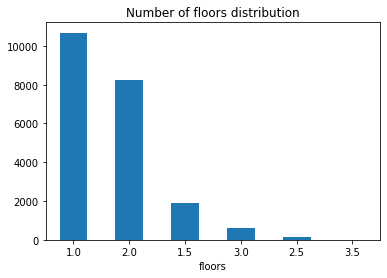

In [315]:
ax = sorted_houses_by_floors.plot.bar(rot=0, title='Number of floors distribution')

<h4>¿Con que tipo de distribución relacionaría el precio de las propiedades cuyo valor es menor o igual a 2000000 dentro del dataset         Demuéstralo con un histograma. </h4>

In [316]:
lower_than_two_M_houses=df[df['price']<=2000000]

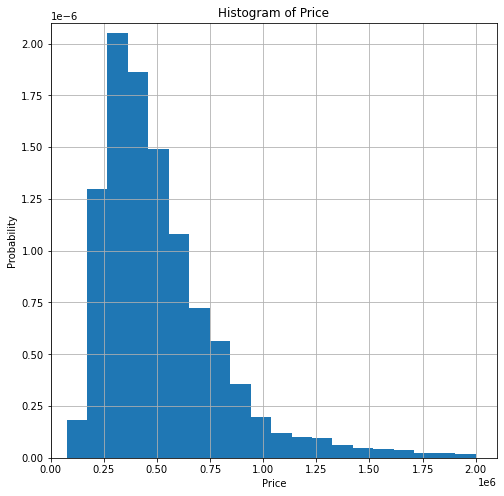

In [317]:
plt.figure(figsize=(8,8))
n, bins, patches = plt.hist(lower_than_two_M_houses['price'], 20, density=True)

plt.xlabel('Price')
plt.ylabel('Probability')
plt.title('Histogram of Price')
plt.xlim(0, 2100000)
plt.ylim(0, 0.0000021)
plt.grid(True)
plt.show()

Según el histograma anterior los precios de las propiedades cuyo valor es menor o igual a 2000000 tienen una distribución normal con asimetría positiva

<h4> Segunda Parte: Machine Learning </h4>

Tomando el dataset de los ejercicios anteriores entrena un modelo que use inteligencia artificial que prediga el precio de propiedades futuras.

Ten en cuenta: 
- Plantear una correcta división del dataset para entrenar y testear. 
- Usar el modelo correcto.
- Métricas de desemempeño.
- Construir una función para poder inferir resultados fuera del dataset.

<h4> EDA </h4>

Se explora el dataset en general

In [318]:
df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [319]:
df.describe(include='all')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
unique,NaN,372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,20140623T000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.580302e+09,NaN,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,NaN,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,NaN,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,NaN,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,NaN,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,NaN,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000


In [320]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

Se veriica que los datos estan distribuidos de forma aleatoria

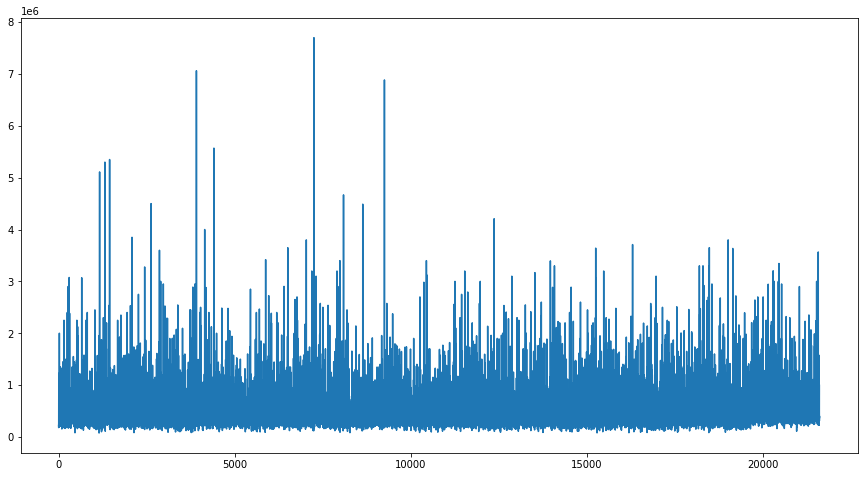

In [321]:
plt.figure(figsize=(15,8))
plt.plot(df.index,df['price'])
plt.show()

Se revisa si hay valores nulos

In [322]:
df.isnull().sum(axis=0)

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Se revisa el número de valores únicos de cada columna

In [323]:
feats_counts = df.nunique(dropna = False)
feats_counts.sort_values()

waterfront           2
view                 5
condition            5
floors               6
grade               12
bedrooms            13
bathrooms           30
zipcode             70
yr_renovated        70
yr_built           116
sqft_basement      306
date               372
long               752
sqft_living15      777
sqft_above         946
sqft_living       1038
price             4028
lat               5034
sqft_lot15        8689
sqft_lot          9782
id               21436
dtype: int64

Se separa la fecha en año, mes y día para poder usarlos en los módelos

In [324]:
df['date']= pd.to_datetime(df['date'] , infer_datetime_format=True)
df['year']=df['date'].dt.year
df['month']=df['date'].dt.month
df['day']=df['date'].dt.day
df=df.drop('date', axis=1)

Se separan los datos para entrenamiento y pruebas. Se escoge una división de 80/20

In [326]:
x=df.drop(['price', 'id'], axis=1)
y=df['price']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

Se separan los datos para entrenamiento y validación, también con una división 80/20

In [327]:
x_train, x_validation, y_train, y_validation = train_test_split(x_train, y_train, test_size=0.2)

In [46]:
print(x.shape)
print(x_train.shape)
print(x_validation.shape)
print(x_test.shape)

(21613, 21)
(13832, 21)
(3458, 21)
(4323, 21)


Se prueban un modelo de tipo gradient boosting y uno lineal y se comparan para obtener el mejor resultado utilizando el error cuadrático medio

<h4>Gradient boosting</h4>

Se utiliza la librería LightGBM

Se escogen los hiperparámetros para entrenar el modelo y se ajustan para disminuir el error con el dataset de validación

In [291]:
lgb_params = {
               'feature_fraction': 0.5,
               'nthread':1, 
               'min_data_in_leaf': 10, 
               'bagging_fraction': 0.5, 
               'learning_rate': 0.001, 
               'objective': 'mse', 
               'bagging_seed': 2**7, 
               'num_leaves': 2,
               'bagging_freq':1,
               'verbose':0,
                'seed': 100
              }

In [292]:
lgbModel = lgb.train(lgb_params, lgb.Dataset(x_train, label=y_train), 100)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002012 seconds.
You can set `force_col_wise=true` to remove the overhead.


In [293]:
validation_pred_lgb = lgbModel.predict(X_validation)
m=mean_squared_error(y_validation, validation_pred_lgb)
print('Validation mean squared error for LightGBM is %f' % m)

Validation mean squared error for LightGBM is 125715052462.422546


<h4>Regresión lineal</h4>

Se utiliza la librería Sklearn con un módelo lineal

In [334]:
lr = LinearRegression()

In [335]:
lr.fit(x_train.values, y_train)

LinearRegression()

In [336]:
validation_pred_lr = lr.predict(X_validation.values)
m=mean_squared_error(y_validation, validation_pred_lr)
print('Validation mean squared_error for linear regression is %f' % m)

Validation mean squared_error for linear regression is 213832706623.686157


<h4>Ensembling</h4>

Se combinan los dos modelos de forma lineal 
$$
mix= \alpha\cdot\text{linreg_prediction}+(1-\alpha)\cdot\text{lgb_prediction}
$$
y se prueba cual relación (alpha) entre los dos produce un menor error

Best alpha: -1.000000; Corresponding mean squared error score on train: 204792772413.933563


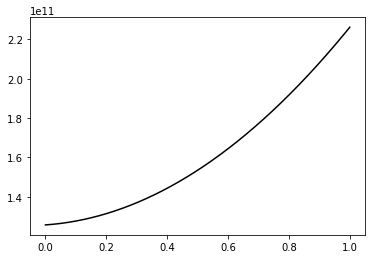

In [299]:
alphas_to_try = np.linspace(0, 1, 1001)

scores=[]
best  = 999
best_alpha = -1
for alpha in alphas_to_try:
    mix = alpha * validation_pred_lr + (1-alpha) * validation_pred_lgb
    score = mean_squared_error(y_validation, mix)
    scores.append(score)
    if score < best:
        best = score
        best_alpha = alpha

plt.plot(alphas_to_try,scores, '-', color='black');

mix = best_alpha * validation_pred_lr + (1-best_alpha) * validation_pred_lgb
score = mean_squared_error(y_validation, mix)

print('Best alpha: %f; Corresponding mean squared error score on train: %f' % (best_alpha, score))

Se observa que el error disminuye con alpha, por lo tanto el mejor alpha a usar es cero. Esto indica que el modelo lineal no mejora el resultado y se usa unicamente el modelo de gradient boosting

<h4>Pruebas</h4>

Finalmente se prueba el modelo con los datos de prueba

In [342]:
pred = lgbModel.predict(x_test)
m=mean_squared_error(y_test, pred)
print('Test mean squared error is %f' % m)

Test mean squared error is 151568936600.918854


Se obtiene un error cuadratico medio de 151568936600.918854 que es cercano al obtenido en validación

<h4> Tercera Parte: Capacidades en SQL </h4>

Resuelve las siguientes preguntas a través de una consulta SQL, La base de datos que usaremos como referencia, se encuentra en:
https://www.w3schools.com/sql/trysql.asp?filename=trysql_select_all
Allí también podrás encontrar un sandbox para realizar las consultas de una manera sencilla.


- Cuales son las categorias de productos que mas han vendido y cuanto han vendido en precio y cantidad.
- Cuantas unidades y dinero de cada producto ha vendido cada empleado 
- Cual es el producto más vendido por cada empleado. 

El orden,buenas prácticas y presentación de las consultas también cuenta. Asegurate de colocarlas en el notebook para que las podamos revisar.

array([[<AxesSubplot:xlabel='id', ylabel='id'>,
        <AxesSubplot:xlabel='price', ylabel='id'>,
        <AxesSubplot:xlabel='bedrooms', ylabel='id'>,
        <AxesSubplot:xlabel='bathrooms', ylabel='id'>,
        <AxesSubplot:xlabel='sqft_living', ylabel='id'>,
        <AxesSubplot:xlabel='sqft_lot', ylabel='id'>,
        <AxesSubplot:xlabel='floors', ylabel='id'>,
        <AxesSubplot:xlabel='waterfront', ylabel='id'>,
        <AxesSubplot:xlabel='view', ylabel='id'>,
        <AxesSubplot:xlabel='condition', ylabel='id'>,
        <AxesSubplot:xlabel='grade', ylabel='id'>,
        <AxesSubplot:xlabel='sqft_above', ylabel='id'>,
        <AxesSubplot:xlabel='sqft_basement', ylabel='id'>,
        <AxesSubplot:xlabel='yr_built', ylabel='id'>,
        <AxesSubplot:xlabel='yr_renovated', ylabel='id'>,
        <AxesSubplot:xlabel='zipcode', ylabel='id'>,
        <AxesSubplot:xlabel='lat', ylabel='id'>,
        <AxesSubplot:xlabel='long', ylabel='id'>,
        <AxesSubplot:xlabel='sqft_livi

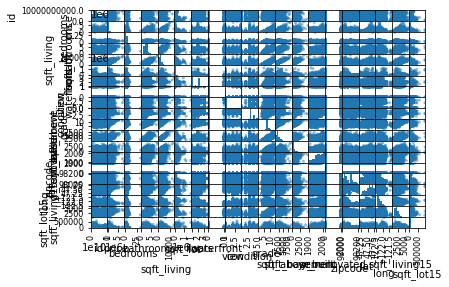

In [186]:
pd.plotting.scatter_matrix(df)